# Codage de Freeman

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from math import sqrt
from matplotlib import pyplot as plt
from itertools import chain
import glob
import os

In [2]:
# Crop image and reshape
allImg = []
for e in [r'imageFiltered/*.jpg']:    
    for filepath in glob.iglob(e): 
        
        filename= filepath.split(os.path.sep)[-1]
        img = cv2.imread('imageFiltered/'+filename)
        img = img[10:700,100:1195]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.threshold(img,245,255,cv2.THRESH_BINARY)
        img = img[1]
        allImg.append(img)

In [3]:
# Change Data cell
n_aImg = []
print("Changing image...")
for k in range(len(allImg)):
    img = allImg[k]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 255:
                img[i][j]=0
            elif img[i][j] == 0:
                img[i][j]=255
    n_aImg.append(img)

Changing image...


In [4]:
print("Number of image loaded : "+str(len(n_aImg))+"...")

Number of image loaded : 10...


In [5]:
## Discover the first point of all images
a_sp = []
for k in range(len(n_aImg)):
    img = n_aImg[k]
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            if value == 255:
                start_point = (i, j)
                print(start_point, value)
                a_sp.append(start_point)
                break
        else:
            continue
        break
#image = img

(60, 568) 255
(82, 813) 255
(78, 764) 255
(49, 588) 255
(24, 636) 255
(0, 723) 255
(15, 695) 255
(0, 797) 255
(0, 852) 255
(16, 765) 255


### Algorithme codage de Freeman :

In [6]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

a_border = []
a_chain = []

for i in range(len(a_sp)):
    border = []
    chain = []
    curr_point = a_sp[i]
    for direction in directions:
        idx = dir2idx[direction]
        new_point = (a_sp[i][0]+change_i[idx], a_sp[i][1]+change_j[idx])
        if n_aImg[i][new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break

    count = 0
    while curr_point != a_sp[i]:
        #figure direction to start search
        b_direction = (direction + 5) % 8 
        dirs_1 = range(b_direction, 8)
        dirs_2 = range(0, b_direction)
        dirs = []
        dirs.extend(dirs_1)
        dirs.extend(dirs_2)
        for direction in dirs:
            idx = dir2idx[direction]
            new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
            if n_aImg[i][new_point] != 0: # if is ROI
                border.append(new_point)
                chain.append(direction)
                curr_point = new_point
                break
        count += 1
    a_border.append(border)
    a_chain.append(chain)

In [7]:
print(count)
#print(a_chain)

1364


# On verifie que les contours marchent
for i in range(len(a_sp)):
    plt.imshow(n_aImg[i], cmap='Greys')
    plt.plot([i[1] for i in a_border[i]], [i[0] for i in a_border[i]])
    plt.show()

### On centre et reduit les variables

In [8]:
import numpy as np 
for i in range(len(a_sp)):
    my=np.mean([i[1] for i in a_border[i]])
    mx=np.mean([i[0] for i in a_border[i]])

    for j in range(len(a_border[i])):
        a_border[i][j] = list(a_border[i][j])
        a_border[i][j][1]=(a_border[i][j][1]-my)/10
        a_border[i][j][0]=(a_border[i][j][0]-mx)/10

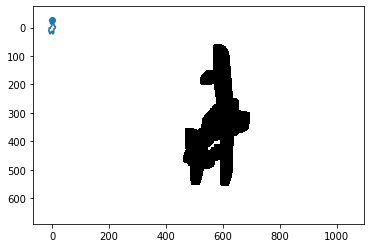

In [9]:
idx = 0
plt.imshow(n_aImg[idx], cmap='Greys')
plt.plot([i[1] for i in a_border[idx]], [i[0] for i in a_border[idx]])
plt.scatter(a_border[idx][0][1],a_border[idx][0][0])
#plt.scatter(a_border[idx][len(a_border[idx])-1][1],a_border[idx][len(a_border[idx])-1][0])

len(border)

### Check for duplicates

seen = []
uniq = []
for x in border:
    if x not in seen:
        uniq.append(x)
        seen.append(x)
if len(uniq) == len(seen) == len(border):
    print("no duplicates")
else :
    print("duplicates")

### Reduce chain size

In [10]:
# retrieve number of sequence and index of each number in an array

In [11]:
a_index = []
a_count = []
for i in range(len(a_chain)):
    tchain = a_chain[i]
    tchain.append(999)
    tmp1 = tchain[0]
    cpt = 0
    index = []
    count = []
    for j in range(len(tchain)):
        cpt+=1
        if tchain[j] is not tmp1 :
            index.append(j-1)
            count.append(cpt-1)
            cpt = 1
        tmp1 = tchain[j]
    tchain.pop(len(tchain)-1);
    a_index.append(index)
    a_count.append(count)

In [12]:
print(len(a_index))

10


In [13]:
print(len(a_count))

10


In [14]:
a_start = []
for k in range(len(a_count)):
    start = []
    zip_object = zip(a_index[k], a_count[k])
    for list1_i, list2_i in zip_object:
        start.append(list1_i-list2_i+1)
    a_start.append(start)

In [15]:
print(len(a_start[1]))

559


In [16]:
print(len(a_start[0]))

376


In [17]:
for j in range(len(a_count)):
    for i in range(len(a_count)):
        a_count[j][i] = a_count[j][i]-1

In [18]:
print(len(a_count))

10


In [19]:
a_end = []
for j in range(len(a_start)):
    end = []
    for i in range(len(a_start[j])):
        end.append(a_start[j][i]+a_count[j][i])
    a_end.append(end)

In [20]:
print(len(a_end))

10


In [21]:
# essential points :

In [22]:
a_fullp = []
for j in range(len(a_start)):
    fullp = []
    for i in range(len(a_start[j])):
        fullp.append(a_start[j][i])
        fullp.append(a_end[j][i])
    a_fullp.append(fullp)

In [23]:
#print(a_fullp)

In [24]:
def remove_duplicate(array):
    tmp = -999
    for i in range(len(array)):
        if array[i] == tmp :
            array.pop(i)
            break
        tmp = array[i]

In [25]:
for j in range(len(a_fullp)):
    for i in range(500):
        remove_duplicate(a_fullp[j])

In [26]:
len(a_fullp[0])

382

In [27]:
# Add selectionned points (those inside fullp)
a_points = []
for j in range(len(a_border)):
    points = []
    for i in range(len(a_border[j])):
        if i in a_fullp[j]:
            points.append(a_border[j][i])
    a_points.append(points)
# separate coordinates


In [28]:
a_points[9][0]

[-24.06131868131868, 10.936849816849815]

In [29]:
points[0][0]

-24.06131868131868

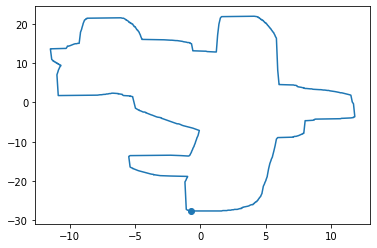

In [30]:
idx = 0
plt.plot([i[1] for i in a_points[idx]], [i[0] for i in a_points[idx]])
plt.scatter([a_points[idx][0][1]], [a_points[idx][1][0]])

In [31]:
len(points)

635

In [32]:
a_x = []
for i in range(len(a_border)):
    x = [j[1] for j in a_points[i]]
    a_x.append(x)

In [33]:
a_y = []
for i in range(len(a_border)):
    y = [j[0] for j in a_points[i]]
    a_y.append(y)

In [34]:
max(points)

[22.03868131868132, -13.163150183150185]

In [35]:
min(points)

[-24.06131868131868, 10.836849816849815]

In [36]:
# Reduit la taille du dataset

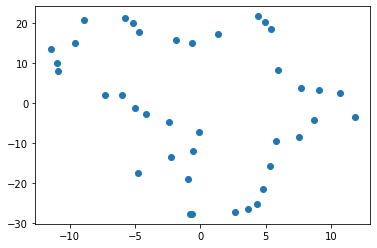

39


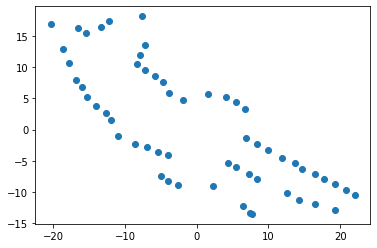

57


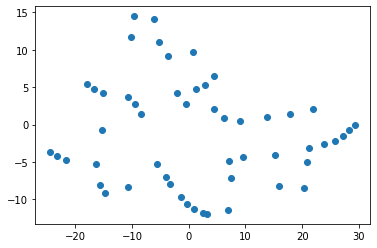

53


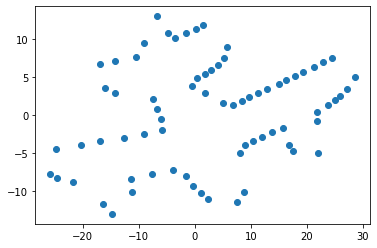

73


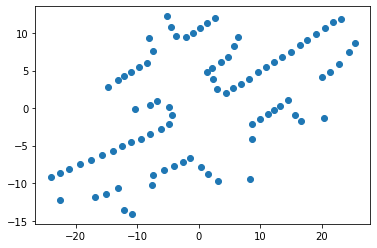

88


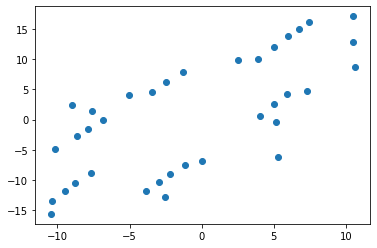

36


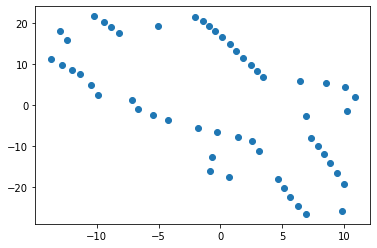

54


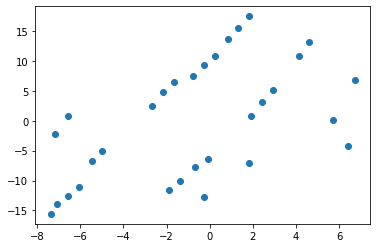

31


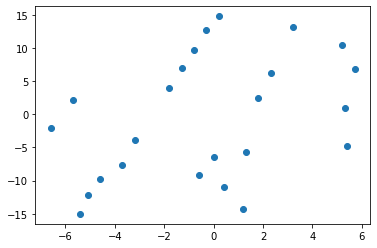

24


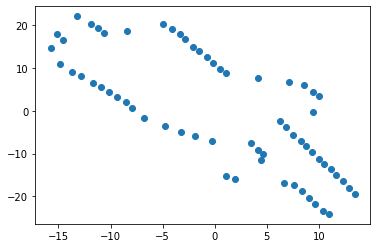

64


In [37]:
a_nx = []
a_ny = []
for j in range(len(a_border)):
    nX = []
    nY = []
    for i in range(len(a_x[j])):
        if i%10 == 0 :
            nX.append(a_x[j][i])
            nY.append(a_y[j][i])
    plt.scatter(nX,nY)
    plt.show()
    print(len(nX))
    a_nx.append(nX)
    a_ny.append(nY)

In [38]:
# Convert to STR readable by Arduino

In [39]:
def getStrFromPoints(points): 
    fullA = "{"
    for i in range(len(points)):
        fullA += "{"
        for j in range(len(points[i])):
            fullA += f"{points[i][j]}" 
            if j != len(points[i])-1:
                fullA += ","
        fullA += "}"
        if i != len(points)-1:
            fullA += ","
    fullA += "}"
    return fullA

In [40]:
x = getStrFromPoints(a_nx)
y = getStrFromPoints(a_ny)